Top 1000 Richest Person in the World EDA

in this project, i will analyze top 1000 Richest person in the world based on forbes ranking, i am interest about knowing the following question

- which industry has the most richest person ?
- which country has the most richest person ?
- percentage between under 50 age and upper 50 age ?

My analysis will help me to answer these question through using Python

for dataset, i use Forbes Billionaire 2022 Datasets obtained from this link                                       
https://www.kaggle.com/datasets/jjdaguirre/forbes-billionaires-2022

In [5]:
#import module and framework
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#import csv dataset
df = pd.read_csv("CSV file/ForbesBillionaire.csv")
df = df[:1000]

#null values check
df.isnull().sum()

#explore data
df.head()
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   rank        1000 non-null   int64 
 2   name        1000 non-null   object
 3   networth    1000 non-null   object
 4   age         1000 non-null   int64 
 5   country     1000 non-null   object
 6   source      1000 non-null   object
 7   industry    1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


cause there is datapoint which should have Dtype int (networth columns), i will convert it into int so later it will not become problem

In [6]:
#remove dollar sign from data in column networth
df.networth = df["networth"].apply(lambda x: x.split(" ")[0])
df.networth = df["networth"].apply(lambda x: x.split("$")[1])

#convert datapoint from object to numerical
df['networth'] = pd.to_numeric(df['networth'])
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


because there are too much unique data in the country column, I will change the data in the country column with a small amount (countries that only have the richest number of people less than 10) to other data


In [7]:
#check amount of unique values in country column
len(df.country.unique())

#make country elimination list 
country_elim = df.groupby(df.country)["country"].agg("count").sort_values(ascending = False)
country_less_10 = country_elim[country_elim < 10]

#convert country which has under 10 rich person to "other" category
df["country"] = df.country.apply(lambda x: "other" if x in country_less_10 else x)

to find out the percentage of rich people aged over 50 years and under 50 years, then I will create a new column to categorize by age

In [8]:
#set label and bin
bins= [0, 50, 100]
labels = ['age under 50','age over 50']

#make category for data age and assign to age_category column
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

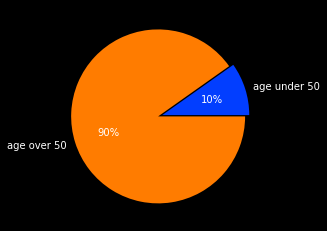

<AxesSubplot:xlabel='industry'>

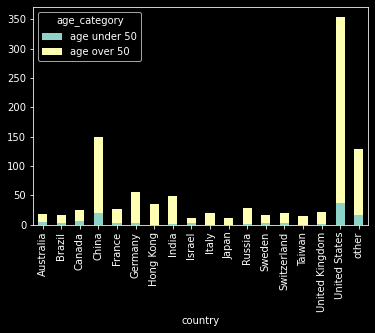

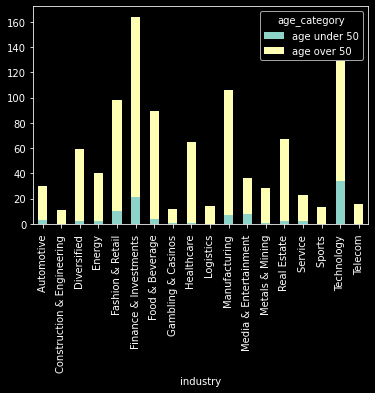

In [12]:
#separate data for visualization
over50 = df[df.age_category == "age under 50"]["age_category"]
under50 = df[df.age_category == "age over 50"]["age_category"]

#setup percentage and label for pie chart
data = [over50.count(), under50.count()]
label = ["age under 50", "age over 50"]

#comparating number of richest person with age under 50 and over 50
plt.pie(data, labels=label, colors=sns.color_palette("bright"), autopct='%.0f%%', explode=[0, 0.05])
plt.show()

#visualization the distribution of the billionaire in every country
pd.crosstab(df.country, df.age_category).plot(kind="bar", stacked=True)

#visualization the distribution of the billionaire in every industry
pd.crosstab(df.industry, df.age_category).plot(kind="bar", stacked=True, )